<a href="https://colab.research.google.com/github/Furkansmbl/Yarat-c-testProject/blob/master/xrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#veri yüklemesi
from google.colab import files
uploaded = files.upload()

Saving Download Data - CRYPTOCURRENCY_US_KRAKEN_XRPUSD.csv to Download Data - CRYPTOCURRENCY_US_KRAKEN_XRPUSD.csv


In [ ]:
#index belirleme
df = pd.read_csv("Download Data - CRYPTOCURRENCY_US_KRAKEN_XRPUSD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Open,High,Low,Close
Date,,,,
2023-05-15,0.4255,0.4304,0.4216,0.4275
2023-05-14,0.4246,0.4316,0.4220,0.4255
2023-05-13,0.4271,0.4319,0.4235,0.4246
2023-05-12,0.4190,0.4430,0.4163,0.4271
2023-05-11,0.4321,0.4322,0.4119,0.4190


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2023-05-15 to 2022-05-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    366 non-null    float64
 1   High    366 non-null    float64
 2   Low     366 non-null    float64
 3   Close   366 non-null    float64
dtypes: float64(4)
memory usage: 14.3 KB


In [ ]:
#kapanış fiyatlarınının adını değiştir
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2023-05-15,0.4275
2023-05-14,0.4255
2023-05-13,0.4246
2023-05-12,0.4271
2023-05-11,0.4190


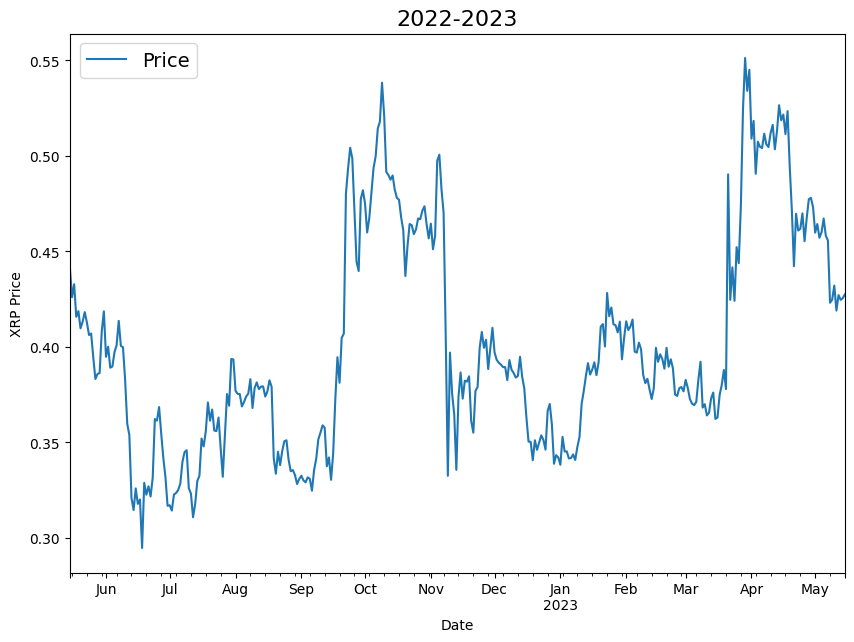

In [ ]:
#grafik
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("XRP Price")
plt.title("2022-2023", fontsize=16)
plt.legend(fontsize=14);


In [ ]:
#numpy serisine dönüştürme
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2023-05-15T00:00:00.000000000', '2023-05-14T00:00:00.000000000',
        '2023-05-13T00:00:00.000000000', '2023-05-12T00:00:00.000000000',
        '2023-05-11T00:00:00.000000000', '2023-05-10T00:00:00.000000000',
        '2023-05-09T00:00:00.000000000', '2023-05-08T00:00:00.000000000',
        '2023-05-07T00:00:00.000000000', '2023-05-06T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.4275, 0.4255, 0.4246, 0.4271, 0.419 , 0.4321, 0.4247, 0.4231,
        0.4557, 0.4582]))

In [ ]:
#test-train oluşturma
split_size = int(0.8 * len(prices))


X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(292, 74, 292, 74)

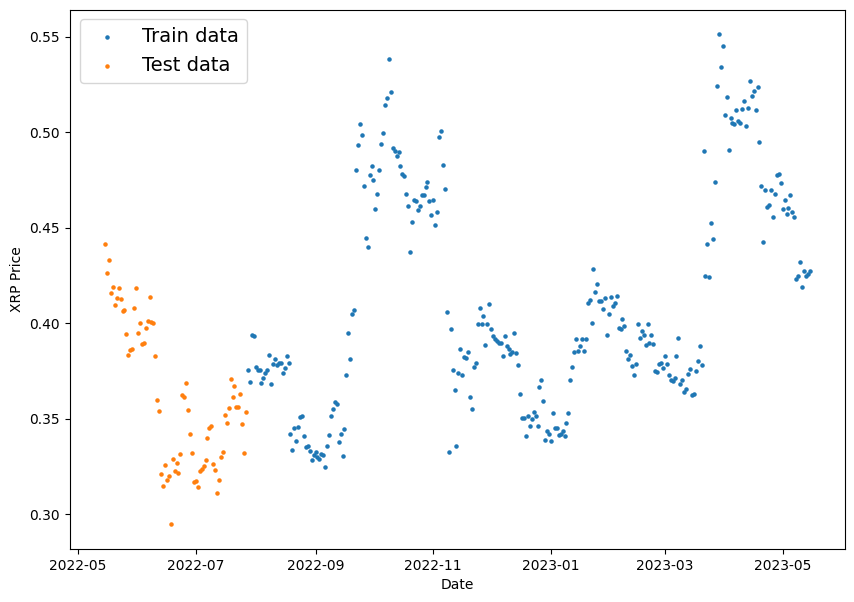

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("XRP Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("XRP Price($)")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

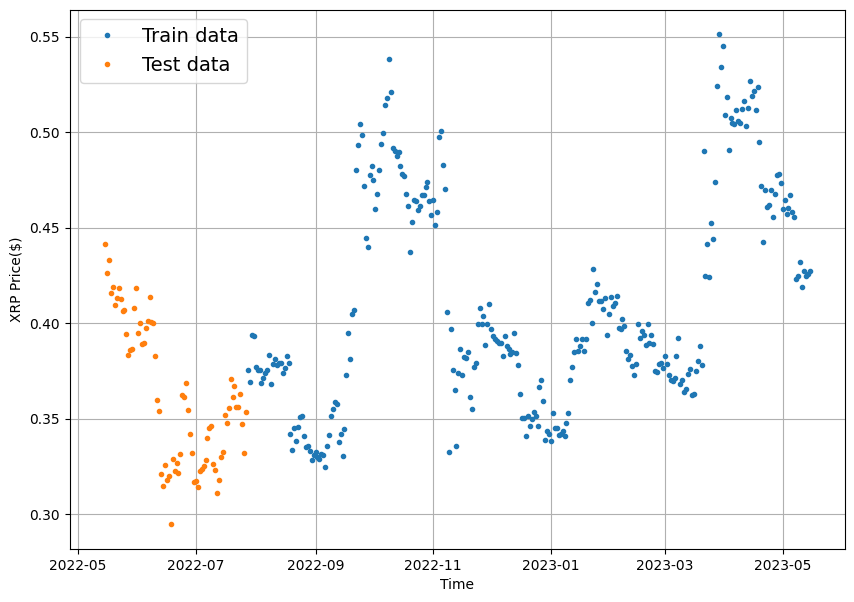

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
#NAİF YAKLAŞIM
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([0.3536, 0.332 , 0.347 , 0.363 , 0.3559, 0.3562, 0.3672, 0.3614,
        0.3709, 0.3558]),
 array([0.407 , 0.4062, 0.4128, 0.4182, 0.4132, 0.4097, 0.4187, 0.4157,
        0.4328, 0.426 ]))

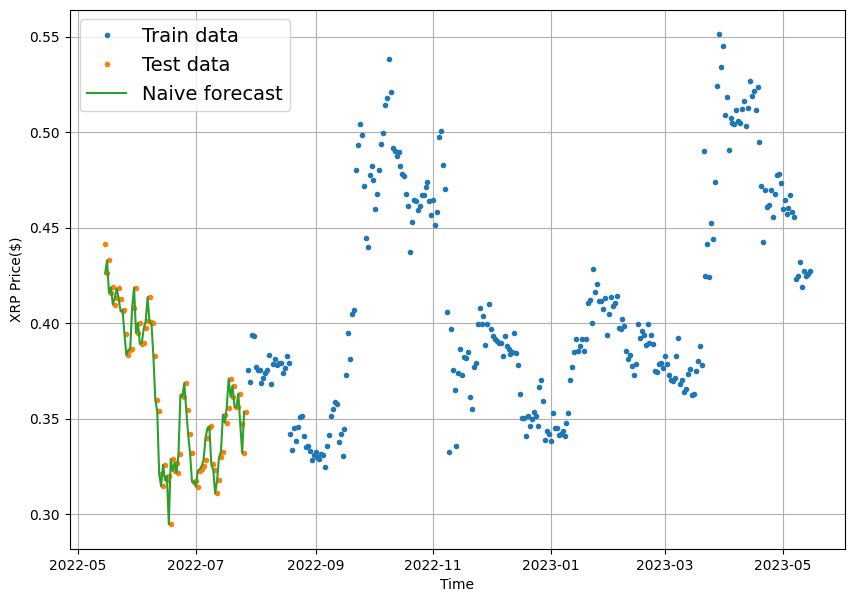

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

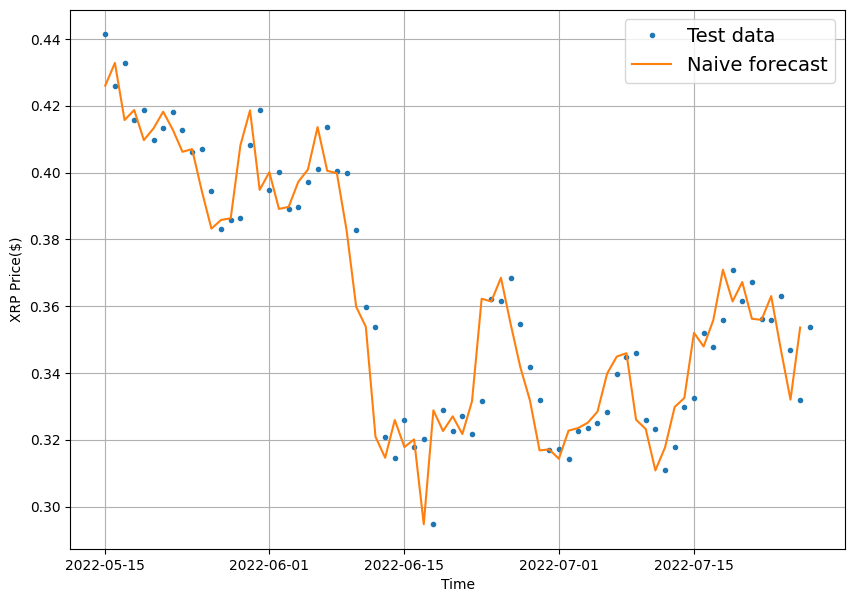

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))


  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.009821918,
 'mse': 0.00015823232,
 'rmse': 0.012579042,
 'mape': 2.7533267,
 'mase': 1.0169371}

In [ ]:
tf.reduce_mean(y_test).numpy()

0.361995945945946

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
 def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows),len(full_labels)

(359, 359)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0.4275 0.4255 0.4246 0.4271 0.419  0.4321 0.4247] -> Label: [0.4231]
Window: [0.4255 0.4246 0.4271 0.419  0.4321 0.4247 0.4231] -> Label: [0.4557]
Window: [0.4246 0.4271 0.419  0.4321 0.4247 0.4231 0.4557] -> Label: [0.4582]


In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [0.4062 0.4128 0.4182 0.4132 0.4097 0.4187 0.4157] -> Label: [0.4328]
Window: [0.4128 0.4182 0.4132 0.4097 0.4187 0.4157 0.4328] -> Label: [0.426]
Window: [0.4182 0.4132 0.4097 0.4187 0.4157 0.4328 0.426 ] -> Label: [0.4414]


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(287, 72, 287, 72)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[0.4275, 0.4255, 0.4246, 0.4271, 0.419 , 0.4321, 0.4247],
        [0.4255, 0.4246, 0.4271, 0.419 , 0.4321, 0.4247, 0.4231],
        [0.4246, 0.4271, 0.419 , 0.4321, 0.4247, 0.4231, 0.4557],
        [0.4271, 0.419 , 0.4321, 0.4247, 0.4231, 0.4557, 0.4582],
        [0.419 , 0.4321, 0.4247, 0.4231, 0.4557, 0.4582, 0.4672]]),
 array([[0.4231],
        [0.4557],
        [0.4582],
        [0.4672],
        [0.46  ]]))

In [ ]:

np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import os


def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
1/3 [=========>....................] - ETA: 11s - loss: 0.2100 - mae: 0.2100

3/3 [==============================] - 7s 469ms/step - loss: 0.1902 - mae: 0.1902 - val_loss: 0.1105 - val_mae: 0.1105
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.1227 - mae: 0.1227

3/3 [==============================] - 0s 235ms/step - loss: 0.1051 - mae: 0.1051 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0304 - mae: 0.0304 - val_loss: 0.0377 - val_mae: 0.0377
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0480 - mae: 0.0480 - val_loss: 0.0556 - val_mae: 0.0556
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0587 - mae: 0.0587 - val_loss: 0.0402 - val_mae: 0.0402
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0445 - mae: 0.0445

3/3 [==============================] - 0s 240ms/step - loss: 0.0363 - mae: 0.0363 - val_loss: 0.0200 - val_mae: 0.0200
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0214 - mae: 0.0214 - val_loss: 0.0271 - val_mae: 0.0271
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0279 - val_mae: 0.0279
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0310 - mae: 0.0310 - val_loss: 0.0201 - val_mae: 0.0201
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0207 - mae: 0.0207 - val_loss: 0.0234 - val_mae: 0.0234
Epoch 11/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0249 - mae: 0.0249 - val_loss: 0.0257 - val_mae: 0.0257
Epoch 12/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0251 - mae: 0.0251 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 13/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0201 - mae: 0.0201 - va

3/3 [==============================] - 0s 234ms/step - loss: 0.0218 - mae: 0.0218 - val_loss: 0.0197 - val_mae: 0.0197
Epoch 16/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0210 - val_mae: 0.0210
Epoch 17/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0204 - val_mae: 0.0204
Epoch 18/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0228 - mae: 0.0228

3/3 [==============================] - 0s 230ms/step - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 19/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0197 - mae: 0.0197

3/3 [==============================] - 0s 242ms/step - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 20/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0187 - mae: 0.0187

3/3 [==============================] - 0s 231ms/step - loss: 0.0199 - mae: 0.0199 - val_loss: 0.0195 - val_mae: 0.0195
Epoch 21/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0198 - val_mae: 0.0198
Epoch 22/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0196 - val_mae: 0.0196
Epoch 23/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0203 - mae: 0.0203

3/3 [==============================] - 1s 248ms/step - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 24/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0151

3/3 [==============================] - 0s 231ms/step - loss: 0.0192 - mae: 0.0192 - val_loss: 0.0194 - val_mae: 0.0194
Epoch 25/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0176

3/3 [==============================] - 0s 232ms/step - loss: 0.0192 - mae: 0.0192 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 26/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.0200

3/3 [==============================] - 0s 241ms/step - loss: 0.0191 - mae: 0.0191 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 27/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0190

3/3 [==============================] - 0s 242ms/step - loss: 0.0191 - mae: 0.0191 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 28/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0188

3/3 [==============================] - 0s 226ms/step - loss: 0.0190 - mae: 0.0190 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 29/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0168

3/3 [==============================] - 0s 243ms/step - loss: 0.0190 - mae: 0.0190 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 30/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0189 - mae: 0.0189 - val_loss: 0.0193 - val_mae: 0.0193
Epoch 31/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0205 - mae: 0.0205

3/3 [==============================] - 0s 229ms/step - loss: 0.0191 - mae: 0.0191 - val_loss: 0.0191 - val_mae: 0.0191
Epoch 32/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0188

3/3 [==============================] - 1s 389ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0189

3/3 [==============================] - 1s 360ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 34/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0189 - val_mae: 0.0189
Epoch 35/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0172

3/3 [==============================] - 1s 373ms/step - loss: 0.0187 - mae: 0.0187 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 36/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0187 - mae: 0.0187

3/3 [==============================] - 1s 356ms/step - loss: 0.0187 - mae: 0.0187 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 37/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0202

3/3 [==============================] - 1s 269ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0187 - val_mae: 0.0187
Epoch 38/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0194 - mae: 0.0194

3/3 [==============================] - 0s 230ms/step - loss: 0.0185 - mae: 0.0185 - val_loss: 0.0186 - val_mae: 0.0186
Epoch 39/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0191 - mae: 0.0191

3/3 [==============================] - 0s 239ms/step - loss: 0.0185 - mae: 0.0185 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 40/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0193 - mae: 0.0193

3/3 [==============================] - 0s 225ms/step - loss: 0.0184 - mae: 0.0184 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 41/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0170

3/3 [==============================] - 1s 247ms/step - loss: 0.0183 - mae: 0.0183 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 42/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0176

3/3 [==============================] - 0s 232ms/step - loss: 0.0183 - mae: 0.0183 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 43/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0182 - mae: 0.0182 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 44/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0185 - mae: 0.0185 - val_loss: 0.0184 - val_mae: 0.0184
Epoch 45/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0164 - mae: 0.0164

3/3 [==============================] - 1s 249ms/step - loss: 0.0182 - mae: 0.0182 - val_loss: 0.0183 - val_mae: 0.0183
Epoch 46/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0192 - mae: 0.0192

3/3 [==============================] - 0s 231ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0181 - val_mae: 0.0181
Epoch 47/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0184 - mae: 0.0184 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 48/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.0184

3/3 [==============================] - 0s 232ms/step - loss: 0.0184 - mae: 0.0184 - val_loss: 0.0180 - val_mae: 0.0180
Epoch 49/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0167

3/3 [==============================] - 0s 222ms/step - loss: 0.0180 - mae: 0.0180 - val_loss: 0.0180 - val_mae: 0.0180
Epoch 50/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0186

3/3 [==============================] - 1s 357ms/step - loss: 0.0179 - mae: 0.0179 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 51/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0172

3/3 [==============================] - 0s 233ms/step - loss: 0.0179 - mae: 0.0179 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 52/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0177

3/3 [==============================] - 0s 239ms/step - loss: 0.0179 - mae: 0.0179 - val_loss: 0.0178 - val_mae: 0.0178
Epoch 53/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 54/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0208

3/3 [==============================] - 0s 225ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0178 - val_mae: 0.0178
Epoch 55/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0192 - mae: 0.0192

3/3 [==============================] - 0s 244ms/step - loss: 0.0180 - mae: 0.0180 - val_loss: 0.0176 - val_mae: 0.0176
Epoch 56/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0176 - mae: 0.0176 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.0184

3/3 [==============================] - 0s 234ms/step - loss: 0.0180 - mae: 0.0180 - val_loss: 0.0175 - val_mae: 0.0175
Epoch 58/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0197 - mae: 0.0197

3/3 [==============================] - 0s 231ms/step - loss: 0.0174 - mae: 0.0174 - val_loss: 0.0175 - val_mae: 0.0175
Epoch 59/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0174 - mae: 0.0174 - val_loss: 0.0176 - val_mae: 0.0176
Epoch 60/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mae: 0.0190

3/3 [==============================] - 1s 267ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0174 - val_mae: 0.0174
Epoch 61/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0172 - mae: 0.0172 - val_loss: 0.0174 - val_mae: 0.0174
Epoch 62/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0186 - mae: 0.0186

3/3 [==============================] - 0s 229ms/step - loss: 0.0176 - mae: 0.0176 - val_loss: 0.0172 - val_mae: 0.0172
Epoch 63/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0173 - mae: 0.0173 - val_loss: 0.0174 - val_mae: 0.0174
Epoch 64/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mae: 0.0184

3/3 [==============================] - 1s 317ms/step - loss: 0.0175 - mae: 0.0175 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 65/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0148 - mae: 0.0148

3/3 [==============================] - 1s 318ms/step - loss: 0.0172 - mae: 0.0172 - val_loss: 0.0170 - val_mae: 0.0170
Epoch 66/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0170 - mae: 0.0170 - val_loss: 0.0173 - val_mae: 0.0173
Epoch 67/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mae: 0.0176

3/3 [==============================] - 1s 343ms/step - loss: 0.0177 - mae: 0.0177 - val_loss: 0.0169 - val_mae: 0.0169
Epoch 68/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0172 - mae: 0.0172 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 69/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0172 - mae: 0.0172 - val_loss: 0.0169 - val_mae: 0.0169
Epoch 70/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0155

3/3 [==============================] - 1s 309ms/step - loss: 0.0170 - mae: 0.0170 - val_loss: 0.0167 - val_mae: 0.0167
Epoch 71/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0168 - mae: 0.0168 - val_loss: 0.0168 - val_mae: 0.0168
Epoch 72/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0158 - mae: 0.0158

3/3 [==============================] - 0s 227ms/step - loss: 0.0169 - mae: 0.0169 - val_loss: 0.0166 - val_mae: 0.0166
Epoch 73/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0161

3/3 [==============================] - 0s 239ms/step - loss: 0.0168 - mae: 0.0168 - val_loss: 0.0165 - val_mae: 0.0165
Epoch 74/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0170 - mae: 0.0170

3/3 [==============================] - 1s 354ms/step - loss: 0.0167 - mae: 0.0167 - val_loss: 0.0165 - val_mae: 0.0165
Epoch 75/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0178 - mae: 0.0178

3/3 [==============================] - 0s 233ms/step - loss: 0.0166 - mae: 0.0166 - val_loss: 0.0164 - val_mae: 0.0164
Epoch 76/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0167

3/3 [==============================] - 1s 247ms/step - loss: 0.0167 - mae: 0.0167 - val_loss: 0.0162 - val_mae: 0.0162
Epoch 77/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0146 - mae: 0.0146

3/3 [==============================] - 0s 227ms/step - loss: 0.0164 - mae: 0.0164 - val_loss: 0.0161 - val_mae: 0.0161
Epoch 78/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0159 - mae: 0.0159

3/3 [==============================] - 0s 239ms/step - loss: 0.0162 - mae: 0.0162 - val_loss: 0.0160 - val_mae: 0.0160
Epoch 79/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0154

3/3 [==============================] - 0s 234ms/step - loss: 0.0163 - mae: 0.0163 - val_loss: 0.0159 - val_mae: 0.0159
Epoch 80/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0145

3/3 [==============================] - 0s 242ms/step - loss: 0.0160 - mae: 0.0160 - val_loss: 0.0158 - val_mae: 0.0158
Epoch 81/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0161

3/3 [==============================] - 0s 230ms/step - loss: 0.0161 - mae: 0.0161 - val_loss: 0.0158 - val_mae: 0.0158
Epoch 82/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0171 - mae: 0.0171

3/3 [==============================] - 0s 228ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: 0.0157 - val_mae: 0.0157
Epoch 83/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0141

3/3 [==============================] - 0s 241ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: 0.0156 - val_mae: 0.0156
Epoch 84/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0161 - mae: 0.0161

3/3 [==============================] - 0s 242ms/step - loss: 0.0158 - mae: 0.0158 - val_loss: 0.0156 - val_mae: 0.0156
Epoch 85/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0154

3/3 [==============================] - 0s 229ms/step - loss: 0.0158 - mae: 0.0158 - val_loss: 0.0155 - val_mae: 0.0155
Epoch 86/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0158 - mae: 0.0158 - val_loss: 0.0155 - val_mae: 0.0155
Epoch 87/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0157 - mae: 0.0157 - val_loss: 0.0155 - val_mae: 0.0155
Epoch 88/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0154 - mae: 0.0154

3/3 [==============================] - 0s 223ms/step - loss: 0.0163 - mae: 0.0163 - val_loss: 0.0154 - val_mae: 0.0154
Epoch 89/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mae: 0.0165

3/3 [==============================] - 0s 228ms/step - loss: 0.0166 - mae: 0.0166 - val_loss: 0.0154 - val_mae: 0.0154
Epoch 90/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0157 - mae: 0.0157 - val_loss: 0.0155 - val_mae: 0.0155
Epoch 91/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0173 - mae: 0.0173

3/3 [==============================] - 1s 360ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: 0.0153 - val_mae: 0.0153
Epoch 92/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0139

3/3 [==============================] - 0s 239ms/step - loss: 0.0159 - mae: 0.0159 - val_loss: 0.0150 - val_mae: 0.0150
Epoch 93/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0151

3/3 [==============================] - 0s 245ms/step - loss: 0.0156 - mae: 0.0156 - val_loss: 0.0149 - val_mae: 0.0149
Epoch 94/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0158 - mae: 0.0158 - val_loss: 0.0150 - val_mae: 0.0150
Epoch 95/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0152 - val_mae: 0.0152
Epoch 96/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0152

3/3 [==============================] - 1s 338ms/step - loss: 0.0156 - mae: 0.0156 - val_loss: 0.0149 - val_mae: 0.0149
Epoch 97/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0167 - mae: 0.0167

3/3 [==============================] - 1s 342ms/step - loss: 0.0154 - mae: 0.0154 - val_loss: 0.0148 - val_mae: 0.0148
Epoch 98/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0132 - mae: 0.0132

3/3 [==============================] - 1s 366ms/step - loss: 0.0153 - mae: 0.0153 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 99/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0150 - mae: 0.0150 - val_loss: 0.0147 - val_mae: 0.0147
Epoch 100/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0147 - val_mae: 0.0147


In [ ]:
model_1.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 0.0147 - mae: 0.0147


[0.0146875511854887, 0.0146875511854887]

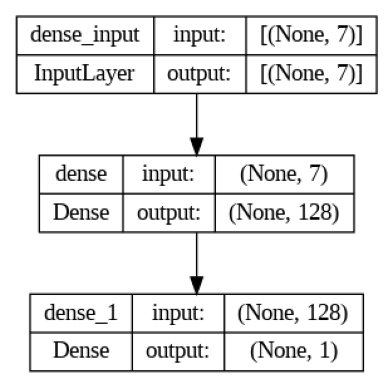

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()
















In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 6ms/step - loss: 0.0146 - mae: 0.0146


[0.014612998813390732, 0.014612998813390732]

In [ ]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

3/3 [==============================] - 0s 5ms/step


(72,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.36356002, 0.36287716, 0.36508057, 0.35817268, 0.35386994,
        0.3564958 , 0.35775942, 0.36260986, 0.3610194 , 0.35704416],
       dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 0.014612999,
 'mse': 0.00034750171,
 'rmse': 0.018641397,
 'mape': 4.07111,
 'mase': 1.524872}

In [ ]:
naive_results


{'mae': 0.009821918,
 'mse': 0.00015823232,
 'rmse': 0.012579042,
 'mape': 2.7533267,
 'mase': 1.0169371}

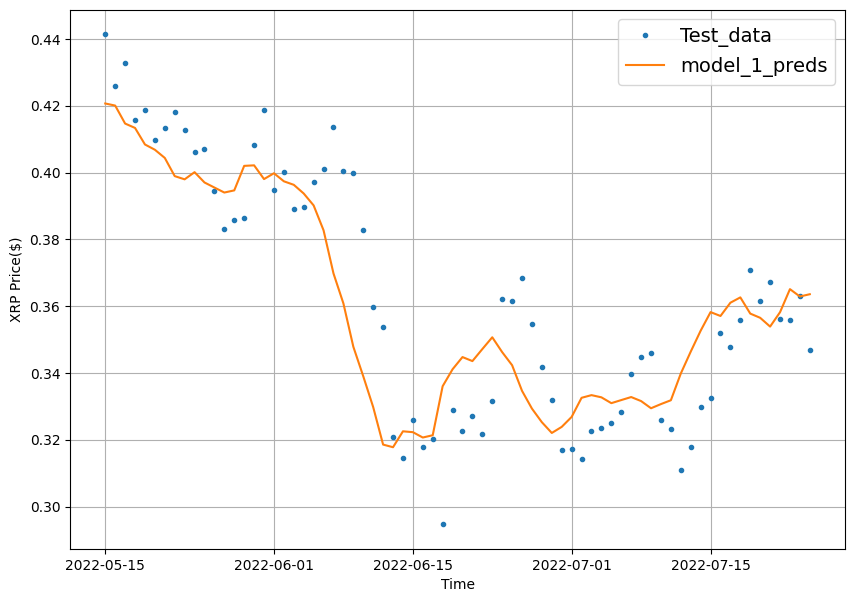

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(336, 336)

In [ ]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(268, 68, 268, 68)

In [ ]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 0.0173


0.017252758145332336

In [ ]:

model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 7ms/step - loss: 0.0154


0.015379630029201508

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

3/3 [==============================] - 0s 3ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 0.01537963,
 'mse': 0.00038887936,
 'rmse': 0.019720025,
 'mape': 4.2857037,
 'mase': 1.5951011}

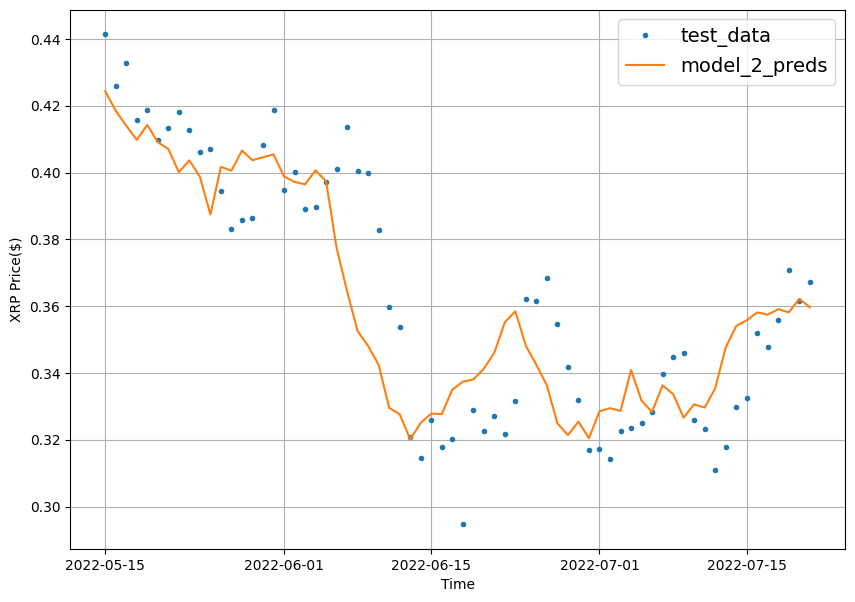

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="-", label="model_2_preds")

In [ ]:
#Model 3: Dense

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(330, 330)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(264, 66, 264, 66)

In [ ]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 0.0257


0.025699228048324585

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)


3/3 [==============================] - 0s 4ms/step - loss: 0.0224


0.0224256981164217

In [ ]:

model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

3/3 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[0.36716738, 0.37594464, 0.36613613, 0.36277533, 0.35250533,
        0.37347183, 0.37234077],
       [0.36624384, 0.372434  , 0.36465994, 0.35079822, 0.3512897 ,
        0.36085945, 0.37170702],
       [0.3620285 , 0.3624929 , 0.37469435, 0.35112292, 0.34789705,
        0.35523444, 0.37017113],
       [0.36060038, 0.35369542, 0.36520973, 0.35287163, 0.35039333,
        0.35427925, 0.35967618],
       [0.364513  , 0.35918224, 0.3582855 , 0.3575073 , 0.3588532 ,
        0.34888792, 0.3615703 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([0.01116153, 0.0115282 , 0.01086178, 0.00845788, 0.00890887,
        0.01451724, 0.02019617, 0.02680109, 0.03192037, 0.0329216 ,
        0.02948368, 0.02386694, 0.02195756, 0.01983654, 0.00940009,
        0.01026721, 0.01103787, 0.01055476, 0.01294698, 0.01714223,
        0.01407352, 0.01206188, 0.01607897, 0.0177947 , 0.02050785,
        0.02384817, 0.02774311, 0.02893056, 0.02085827, 0.0192845 ,
        0.01501555, 0.02336523, 0.03140404, 0.03165569, 0.02783127,
        0.02630904, 0.0247367 , 0.02138892, 0.01202058, 0.01809672,
        0.02907384, 0.03547883, 0.04635993, 0.05563534, 0.06097962,
        0.06079011, 0.05524958, 0.04941613, 0.03913803, 0.03011444,
        0.02079175, 0.02083981, 0.01618465, 0.01057812, 0.01037848,
        0.0150951 , 0.014909  , 0.01335945, 0.00673527, 0.00990406,
        0.01060859, 0.0121004 , 0.01506821, 0.02065953, 0.02117848,
        0.02269558], dtype=float32),
 'mse': array([1.55148286e-04, 1.54364054e-04, 1.80628849e-04, 9.5731949

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)


  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)


  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 0.022425698,
 'mse': 0.00081089337,
 'rmse': 0.025316788,
 'mape': 6.2280064,
 'mase': 2.3453}

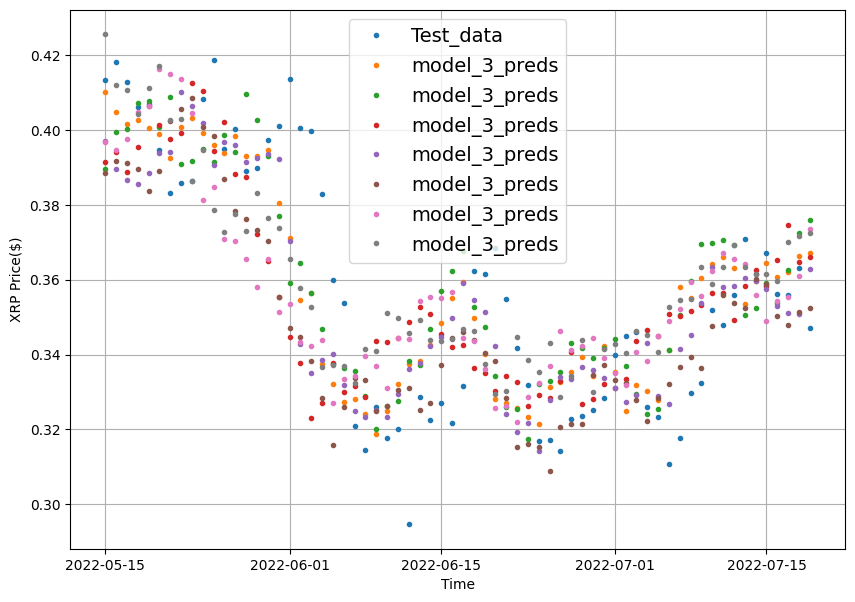

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, label="model_3_preds")

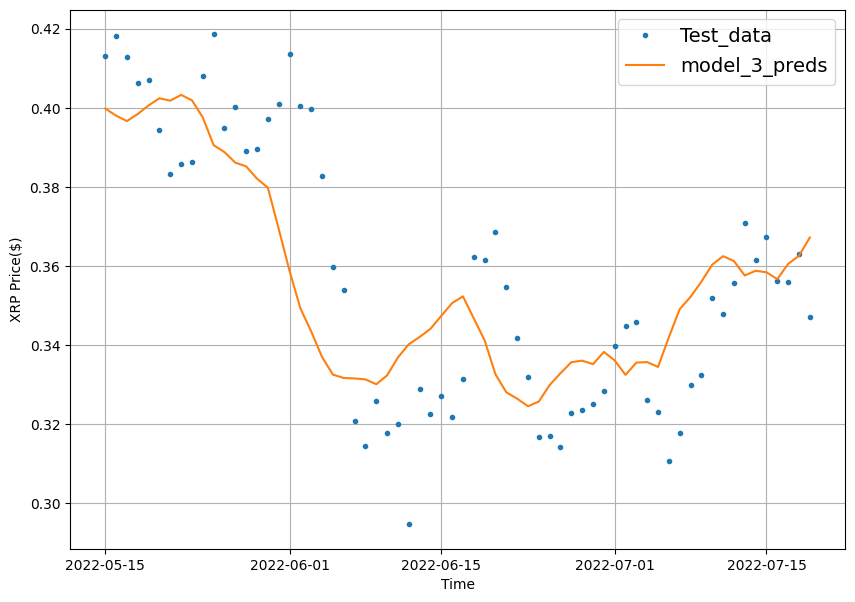

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 label="model_3_preds")

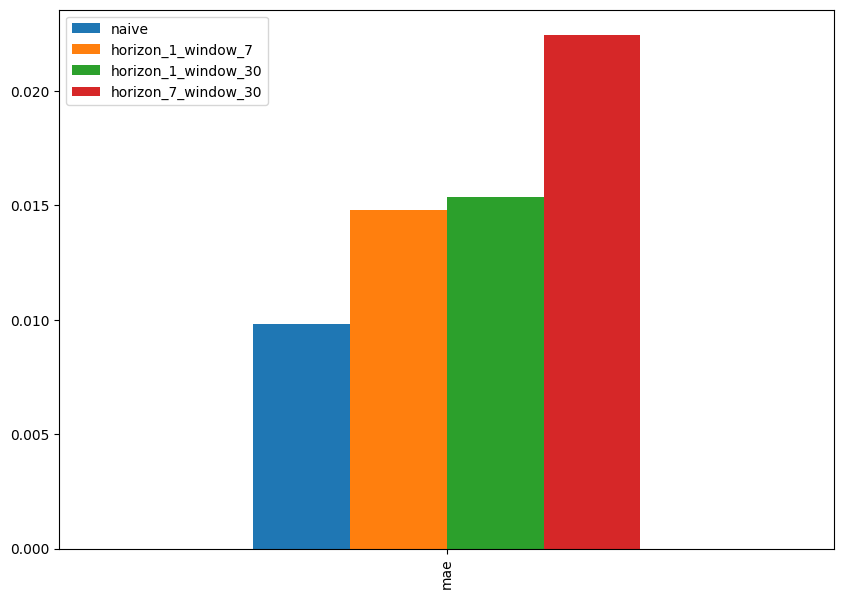

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(359, 359)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(287, 72, 287, 72)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[0.4275]
 [0.4255]
 [0.4246]
 [0.4271]
 [0.419 ]
 [0.4321]
 [0.4247]]


In [ ]:
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([

  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")


model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 13ms/step - loss: 0.0155


0.01551986113190651

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

3/3 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.36976743, 0.362184  , 0.35938275, 0.35995188, 0.35751066,
       0.35691378, 0.3606793 , 0.36521488, 0.36470518, 0.36204997],
      dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 0.015519861,
 'mse': 0.0003732571,
 'rmse': 0.019319862,
 'mape': 4.3603396,
 'mase': 1.6195034}

In [ ]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 0.0164


0.016353003680706024

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

3/3 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.37113696, 0.36592942, 0.36276495, 0.3588179 , 0.35810992,
       0.35881895, 0.36007202, 0.36465415, 0.3648447 , 0.36316583],
      dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 0.016353004,
 'mse': 0.00040486493,
 'rmse': 0.020121256,
 'mape': 4.604099,
 'mase': 1.7064421}

In [ ]:
bitcoin_prices.head()

,Price
Date,
2023-05-15,0.4275
2023-05-14,0.4255
2023-05-13,0.4246
2023-05-12,0.4271
2023-05-11,0.4190


In [ ]:

block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime  =  np.datetime64 ( "2012-11-28" )
block_reward_3_datetime  =  np.datetime64 ( "2016-07-09" )
block_reward_4_datetime  =  np.datetime64 ( "2020-05-11" )

NameError: ignored

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(-15, 1)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2023-05-15,0.4275,25
2023-05-14,0.4255,6.25
2023-05-13,0.4246,6.25
2023-05-12,0.4271,6.25
2023-05-11,0.4190,6.25


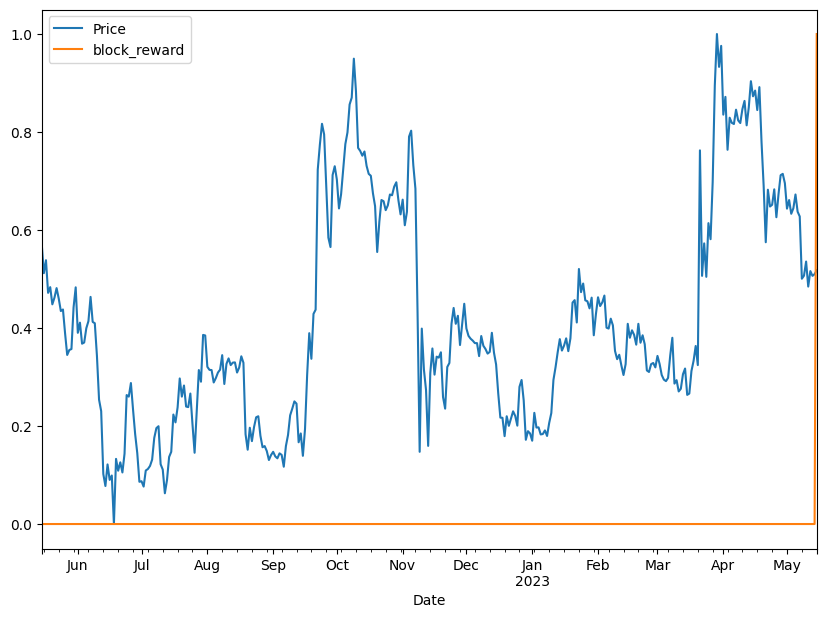

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-05-15,0.4275,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-14,0.4255,6.25,0.4275,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-13,0.4246,6.25,0.4255,0.4275,NaN,NaN,NaN,NaN,NaN
2023-05-12,0.4271,6.25,0.4246,0.4255,0.4275,NaN,NaN,NaN,NaN
2023-05-11,0.4190,6.25,0.4271,0.4246,0.4255,0.4275,NaN,NaN,NaN
2023-05-10,0.4321,6.25,0.4190,0.4271,0.4246,0.4255,0.4275,NaN,NaN
2023-05-09,0.4247,6.25,0.4321,0.4190,0.4271,0.4246,0.4255,0.4275,NaN
2023-05-08,0.4231,6.25,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255,0.4275
2023-05-07,0.4557,6.25,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2023-05-08,6.25,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255,0.4275
2023-05-07,6.25,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255
2023-05-06,6.25,0.4557,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246
2023-05-05,6.25,0.4582,0.4557,0.4231,0.4247,0.4321,0.4190,0.4271
2023-05-04,6.25,0.4672,0.4582,0.4557,0.4231,0.4247,0.4321,0.4190


In [ ]:
y.head()

Date
2023-05-08    0.4231
2023-05-07    0.4557
2023-05-06    0.4582
2023-05-05    0.4672
2023-05-04    0.4600
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(287, 287, 72, 72)

In [ ]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")


model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0157


0.01567602902650833

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

3/3 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.36890653, 0.3645074 , 0.36272395, 0.35702878, 0.3521801 ,
       0.35664982, 0.3609866 , 0.36370465, 0.36364216, 0.36005858],
      dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 0.015676029,
 'mse': 0.00039386257,
 'rmse': 0.01984597,
 'mape': 4.3861556,
 'mase': 1.6357995}

In [ ]:
model_1_results

{'mae': 0.014806188,
 'mse': 0.00034651882,
 'rmse': 0.018615015,
 'mape': 4.183337,
 'mase': 1.5450313}

In [ ]:

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.16889448 -0.09424324 -0.36118844  0.4577934  -0.31374556  1.3294847
  0.29303974]
Forecast: -0.5336540937423706


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2023-05-15,0.4275
2023-05-14,0.4255
2023-05-13,0.4246
2023-05-12,0.4271
2023-05-11,0.4190


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2023-05-08,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255,0.4275
2023-05-07,0.4557,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246,0.4255
2023-05-06,0.4582,0.4557,0.4231,0.4247,0.4321,0.4190,0.4271,0.4246
2023-05-05,0.4672,0.4582,0.4557,0.4231,0.4247,0.4321,0.4190,0.4271
2023-05-04,0.4600,0.4672,0.4582,0.4557,0.4231,0.4247,0.4321,0.4190


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(287, 287, 72, 72)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))


BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])


added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)


nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")


backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")


for i, _ in enumerate(range(N_STACKS-1)):


  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")


model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")


model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])


model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 122: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 258: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 358: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 1min 22s, sys: 1.67 s, total: 1min 24s
Wall time: 1min 30s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 46ms/step - loss: 0.0090 - mae: 0.0090 - mse: 1.3961e-04


[0.009038226678967476, 0.009038226678967476, 0.00013961292279418558]

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 32s 32s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.33617216, 0.343032  , 0.35682827, 0.35618272, 0.35888833,
       0.36304554, 0.3585118 , 0.36570558, 0.35933834, 0.34874088],
      dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 0.009038227,
 'mse': 0.00013961292,
 'rmse': 0.011815791,
 'mape': 2.5408237,
 'mase': 0.9431424}

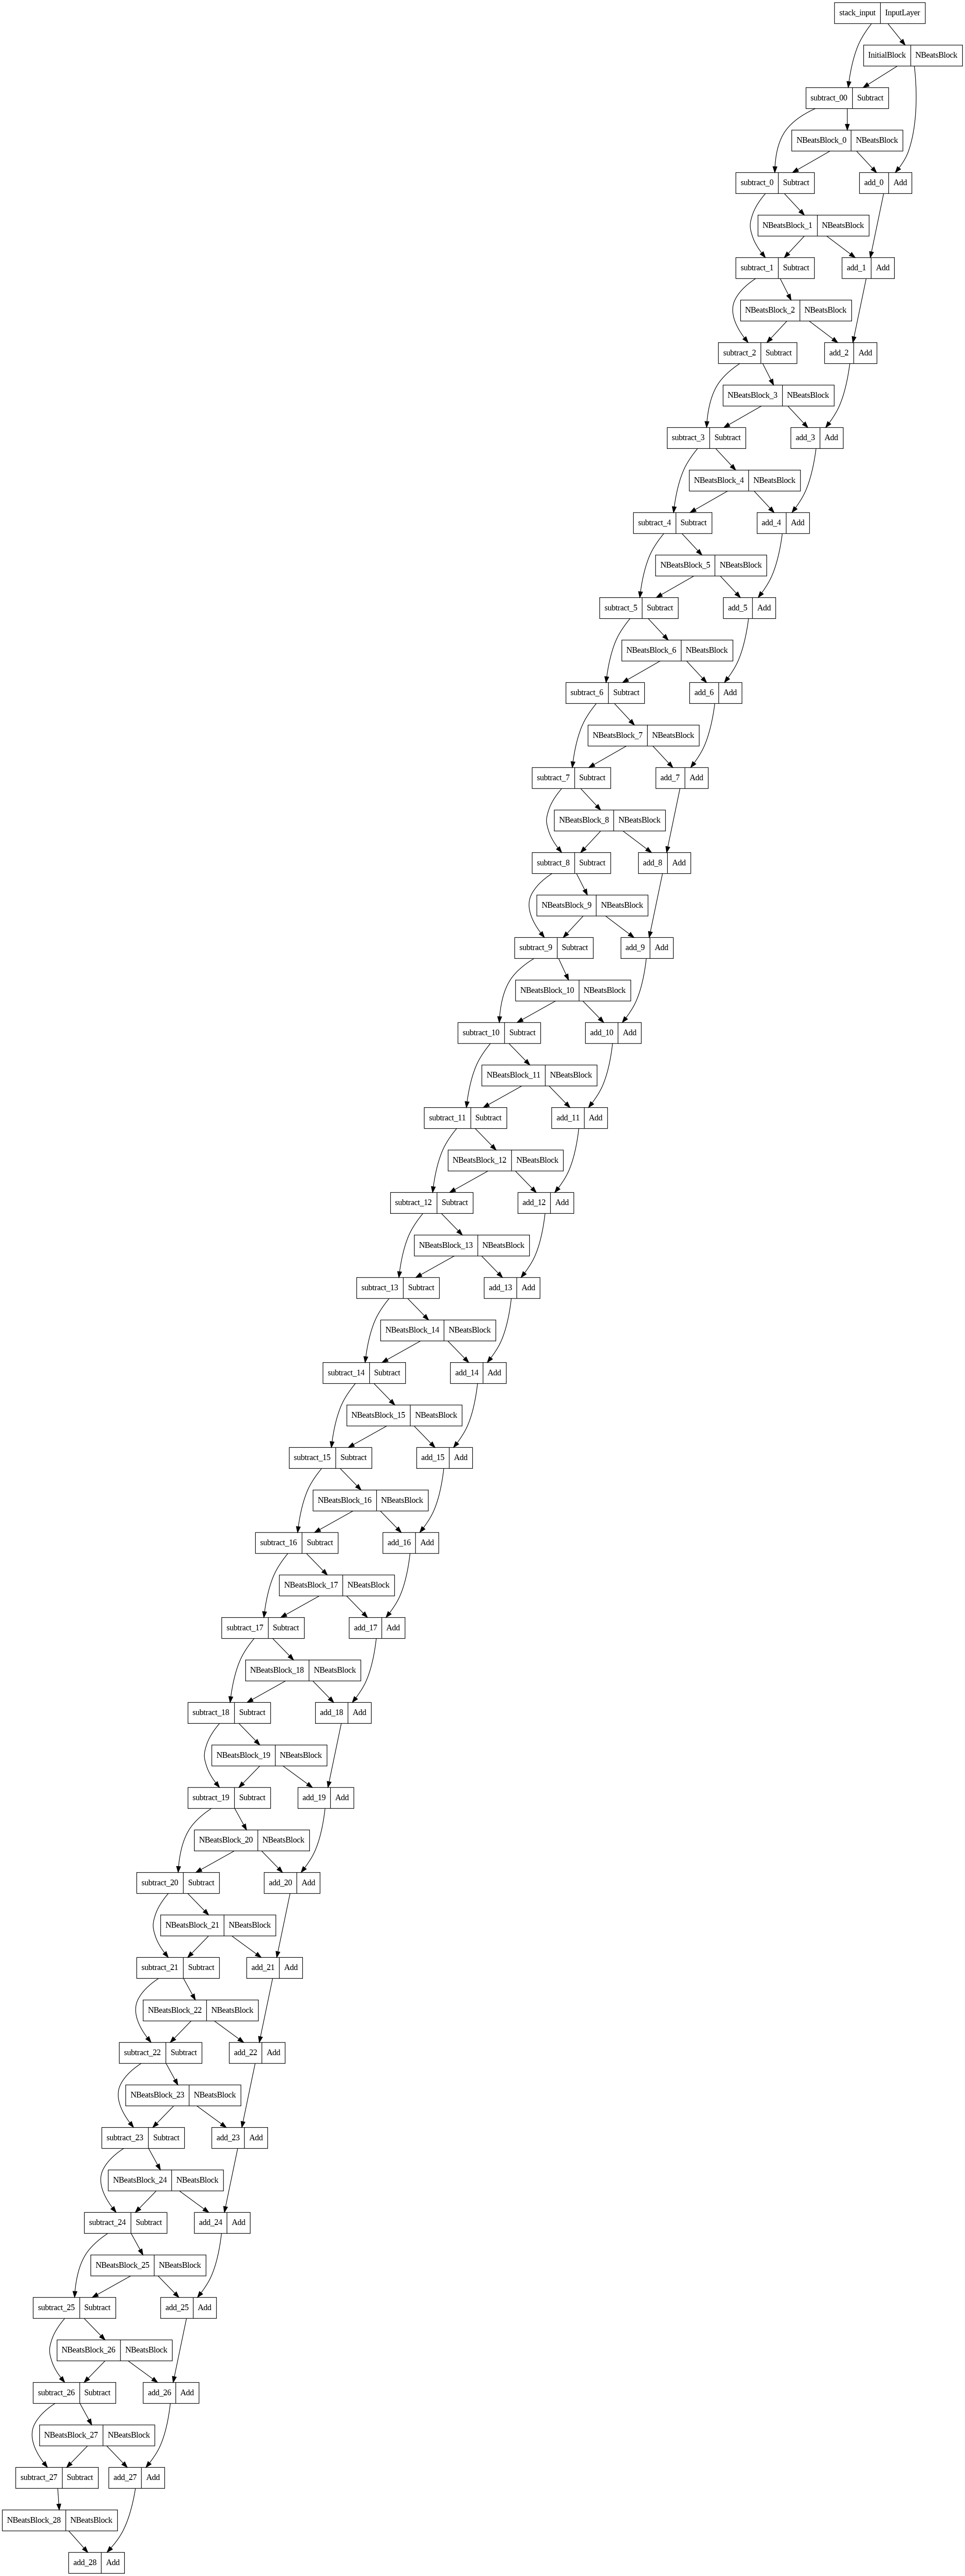

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
model_7.save(model_7.name)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):


  ensemble_models = []


  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"REDUCE: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])


      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 286: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 386: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 167: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 267: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 367: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 467: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 567: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 667: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 767: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 361: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 71ms/step


<tf.Tensor: shape=(15, 72), dtype=float32, numpy=
array([[0.329781  , 0.3457402 , 0.37142593, ..., 0.41503865, 0.42910194,
        0.42704767],
       [0.35807055, 0.34745687, 0.34892818, ..., 0.41765788, 0.43271223,
        0.42041275],
       [0.33552077, 0.35030797, 0.3579009 , ..., 0.41450986, 0.43163097,
        0.42630732],
       ...,
       [0.33072254, 0.34627804, 0.36214808, ..., 0.41655013, 0.42750022,
        0.42668223],
       [0.34373632, 0.3331833 , 0.35737815, ..., 0.41491446, 0.41803148,
        0.43085897],
       [0.33340696, 0.34539014, 0.35716665, ..., 0.41375825, 0.4297559 ,
        0.42408565]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 0.009215332,
 'mse': 0.00014602304,
 'rmse': 0.012084,
 'mape': 2.5809653,
 'mase': 0.9616234}

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)


  interval = 1.96 * std


  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

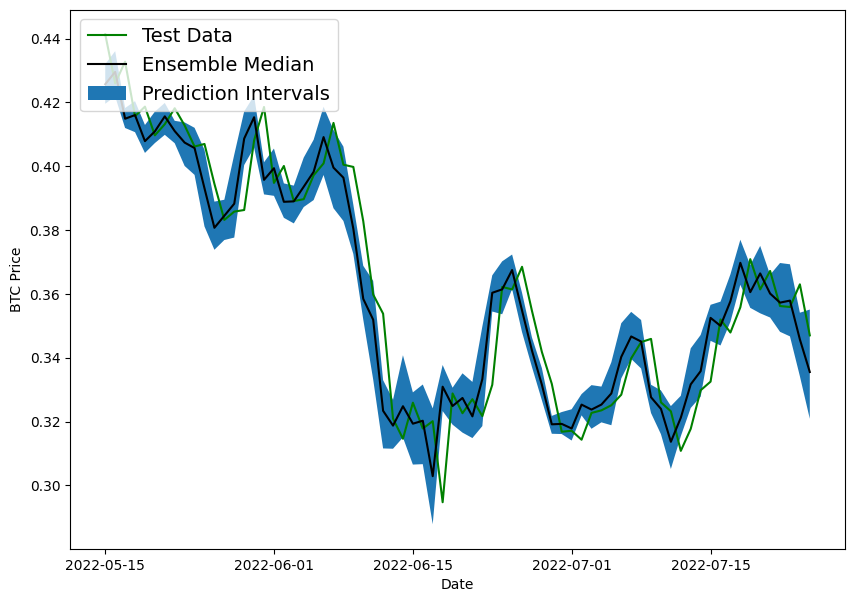

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

plt.figure(figsize=(10, 7))
plt.plot(X_test.index[:], y_test[:], "g", label="Test Data")
plt.plot(X_test.index[:], ensemble_median[:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[:],
                 (lower)[:],
                 (upper)[:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-05-15,0.4275,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-14,0.4255,6.25,0.4275,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-13,0.4246,6.25,0.4255,0.4275,NaN,NaN,NaN,NaN,NaN
2023-05-12,0.4271,6.25,0.4246,0.4255,0.4275,NaN,NaN,NaN,NaN
2023-05-11,0.4190,6.25,0.4271,0.4246,0.4255,0.4275,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)


dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))


BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])


model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())


model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:]


  for _ in range(into_future):


    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [0.4132 0.4097 0.4187 0.4157 0.4328 0.426  0.4414] -> Prediction: 0.4110023081302643

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [0.4097     0.4187     0.4157     0.4328     0.426      0.4414
 0.41100231] -> Prediction: 0.41991889476776123

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [0.4187     0.4157     0.4328     0.426      0.4414     0.41100231
 0.41991889] -> Prediction: 0.42198824882507324

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [0.4157     0.4328     0.426      0.4414     0.41100231 0.41991889
 0.42198825] -> Prediction: 0.4267546236515045

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [0.4328     0.426      0.4414     0.41100231 0.41991889 0.42198825
 0.42675462] -> Prediction: 0.4255927801132202

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [0.426      0.4414     0.41100231 0.419918

In [ ]:
future_forecast[:10]

[0.4110023,
 0.4199189,
 0.42198825,
 0.42675462,
 0.42559278,
 0.42652938,
 0.42250973,
 0.41855383,
 0.42281497,
 0.4241129]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-05-15 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23',
       '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
       '2022-05-28', '2022-05-29'], dtype='datetime64[D]')